In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plot
from glob import glob

In [ ]:
IMAGESHAPE = [224, 224, 3]
training_data = '/content/drive/MyDrive/TB_Chest_Radiography_Database/train'
testing_data = '/content/drive/MyDrive/TB_Chest_Radiography_Database/test'

In [ ]:
import os

# Path to the directory in Google Drive
directory_path_normal = '/content/drive/MyDrive/TB_Chest_Radiography_Database/train/Normal'
directory_path_tb = '/content/drive/MyDrive/TB_Chest_Radiography_Database/train/Tuberculosis'

# Count the number of files in the directory
num_files = sum([len(files) for r, d, files in os.walk(directory_path_normal)])
print(f'Normal count "{directory_path_normal}" is: {num_files}')

num_files = sum([len(files) for r, d, files in os.walk(directory_path_tb)])
print(f'Pneumonia count "{directory_path_tb}" is: {num_files}')

Normal count "/content/drive/MyDrive/TB_Chest_Radiography_Database/train/Normal" is: 3300
Pneumonia count "/content/drive/MyDrive/TB_Chest_Radiography_Database/train/Tuberculosis" is: 650


In [ ]:
vgg_model = VGG16(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
for each_layer in vgg_model.layers:
    each_layer.trainable = False

In [ ]:
flatten_layer = Flatten()(vgg_model.output)
prediction = Dense(1, activation='sigmoid')(flatten_layer)

In [ ]:
final_model = Model(inputs=vgg_model.input, outputs=prediction)
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
import tensorflow as tf
final_model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=[tf.keras.metrics.Recall()]
)

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
testing_datagen = ImageDataGenerator(rescale =1. / 255)

In [ ]:

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/TB_Chest_Radiography_Database/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 3950 images belonging to 2 classes.


In [ ]:
test_set = testing_datagen.flow_from_directory('/content/drive/MyDrive/TB_Chest_Radiography_Database/test',
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'binary')

Found 250 images belonging to 2 classes.


In [ ]:
fitted_model = final_model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=124,
  validation_steps=8
)

Epoch 1/10
124/124 [==============================] - 2344s 19s/step - loss: 0.1413 - recall: 0.7538 - val_loss: 0.0343 - val_recall: 1.0000
Epoch 2/10
124/124 [==============================] - 98s 788ms/step - loss: 0.0717 - recall: 0.9000 - val_loss: 0.0193 - val_recall: 1.0000
Epoch 3/10
124/124 [==============================] - 98s 791ms/step - loss: 0.0579 - recall: 0.9215 - val_loss: 0.0199 - val_recall: 0.9800
Epoch 4/10
124/124 [==============================] - 98s 786ms/step - loss: 0.0427 - recall: 0.9462 - val_loss: 0.0129 - val_recall: 1.0000
Epoch 5/10
124/124 [==============================] - 95s 767ms/step - loss: 0.0444 - recall: 0.9338 - val_loss: 0.0062 - val_recall: 1.0000
Epoch 6/10
124/124 [==============================] - 100s 800ms/step - loss: 0.0372 - recall: 0.9508 - val_loss: 0.0101 - val_recall: 1.0000
Epoch 7/10
124/124 [==============================] - 96s 778ms/step - loss: 0.0353 - recall: 0.9554 - val_loss: 0.0062 - val_recall: 1.0000
Epoch 8/10
1

In [ ]:
final_model.save('/content/drive/MyDrive/saved_models/tb-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Check the class indices
print(training_set.class_indices)

{'Normal': 0, 'Tuberculosis': 1}


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

testing_image = '/content/sample_data/tb-test2.jpg'
# Load the image with target size matching the input size of the model
img = image.load_img(testing_image, target_size=(224, 224))  # Adjust target_size as per your model input size

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to match the model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image data (assuming the model was trained on normalized data)
img_array = img_array / 255.0

In [ ]:
final_model.predict(img_array)

1/1 [==============================] - 0s 18ms/step


array([[0.9603492]], dtype=float32)

In [ ]:
if final_model.predict(img_array)[0][0] > 0.5:
  print('The person is affected by Tuberculosis')
else:
  print('The person is safe')

1/1 [==============================] - 0s 39ms/step
The person is affected by Tuberculosis


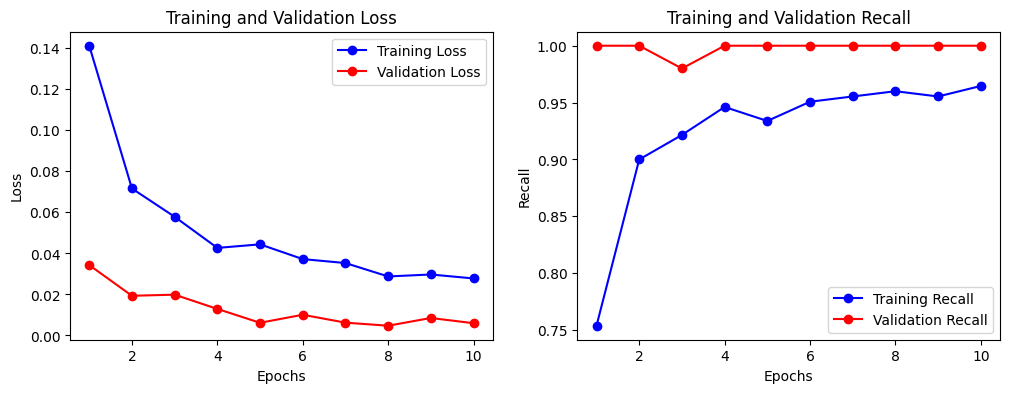

In [ ]:
import matplotlib.pyplot as plt
# Extracting training and validation loss and accuracy
train_loss = fitted_model.history['loss']
val_loss = fitted_model.history['val_loss']
train_accuracy = fitted_model.history['recall']
val_accuracy = fitted_model.history['val_recall']
epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Recall')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

plt.savefig('/content/drive/MyDrive/saved_models/tb-model-plots.png')